CUSTOMER CHURN DATA GENERATION

Generating 5,000 customer records...
  Generated 1,000 customers...
  Generated 2,000 customers...
  Generated 3,000 customers...
  Generated 4,000 customers...
  Generated 5,000 customers...

✅ Generated 5,000 customer records

DATASET OVERVIEW

Dataset Shape: 5,000 rows × 18 columns

Churn Rate: 23.60%
  - Churned customers: 1,180
  - Retained customers: 3,820

------------------------------------------------------------
FEATURE SUMMARY:
------------------------------------------------------------

Numeric Features:
       tenure_days  monthly_reoccuring_revenue  logins_30d  \
count      5000.00                     5000.00     5000.00   
mean        374.54                       49.03       11.94   
std         202.06                       69.54        6.56   
min          30.00                        0.00        0.00   
25%         203.00                        0.00        7.00   
50%         371.00                       49.00       13.00   
75%       

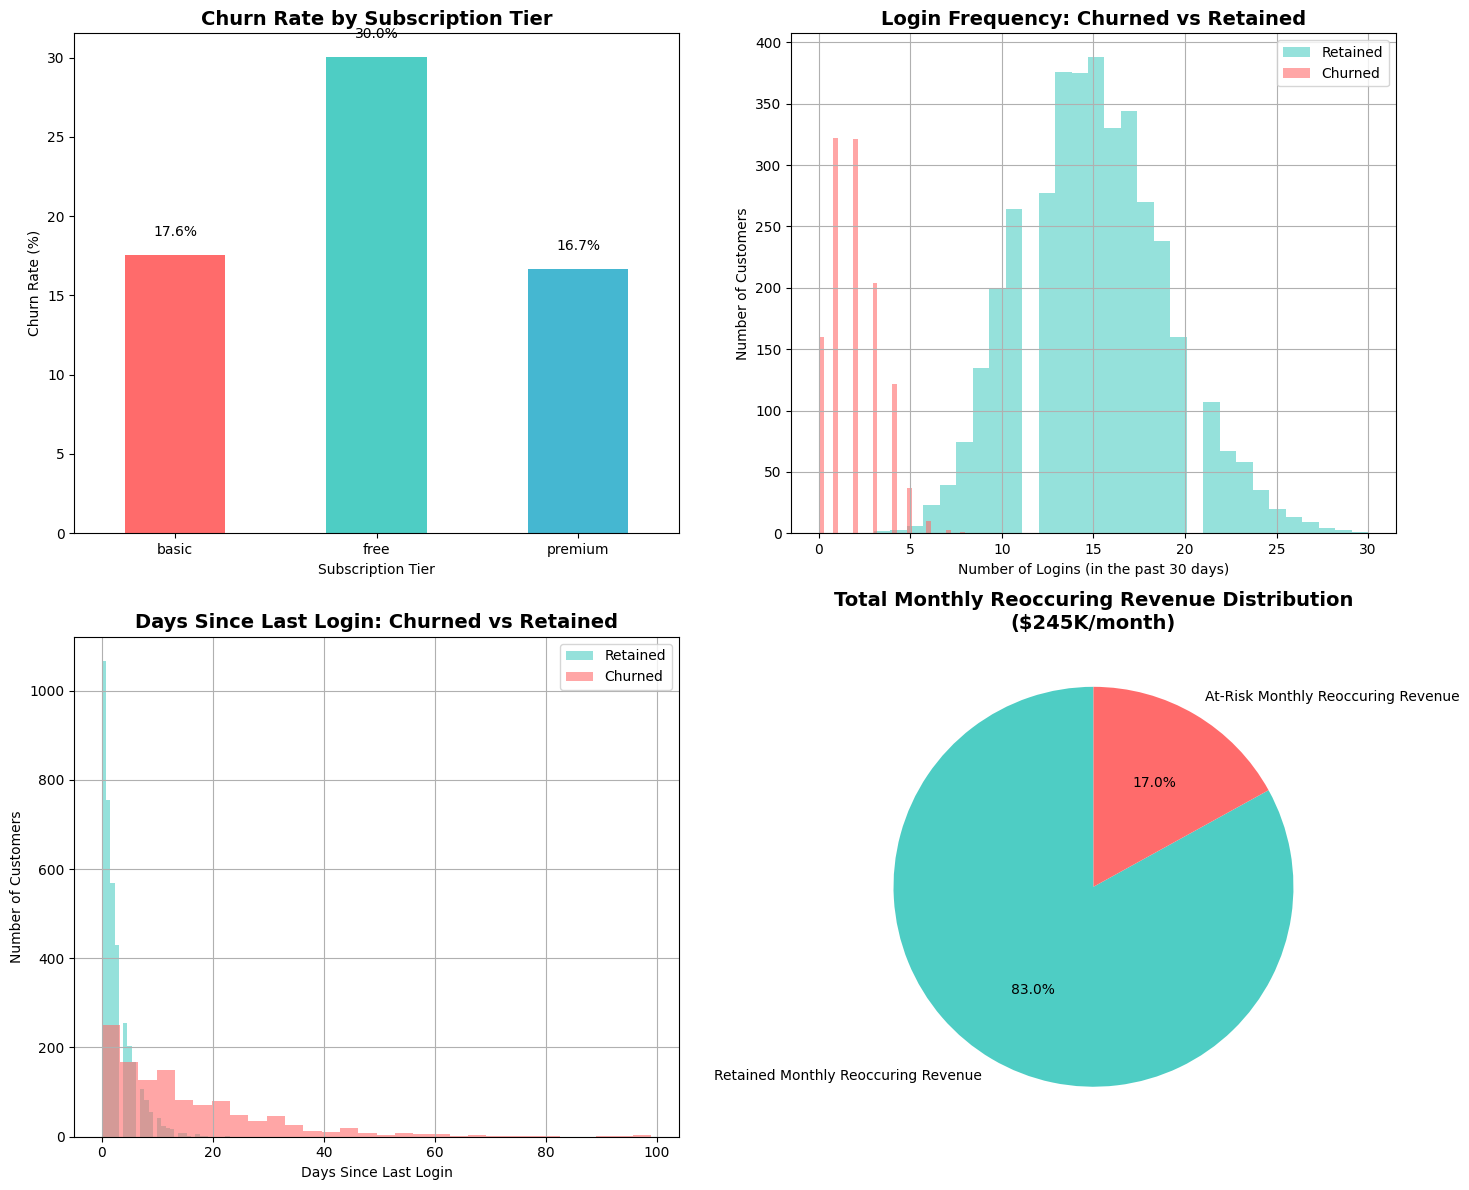

In [2]:
### Notebook 1: Customer Churn Data Generation
### Project: Churn Prevention System
### This notebook creates a realistic synthetic dataset of customer behavior

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

### Set random seed for reproducibility
np.random.seed(42)

print("=" * 60)
print("CUSTOMER CHURN DATA GENERATION")
print("=" * 60)

### =============================================================================
### PART 1: DEFINE DATA SCHEMA
### =============================================================================

"""
I created a SaaS customer dataset with listed features below:

CUSTOMER PROFILE:
- customer_id: Unique identifier
- signup_date: The date when the customer joined 
- subscription_tier: Ranging from free/basic/premium
- monthly_recurring_revenue (MRR): Revenue per month
- company_size: Number of employees
- industry: Customer's industry

ENGAGEMENT METRICS (Last 30 days):
- logins_30d: Number of logins
- session_duration_avg: Average session length (minutes)
- features_used: Number of distinct features accessed
- power_feature_usage: Advanced features used
- days_since_last_login: Recency metric

SUPPORT METRICS:
- support_tickets_30d: Number of tickets
- ticket_sentiment: Sentiment score (-1 to 1)
- net_promoter_score: Net Promoter Score (0-10)

BILLING METRICS:
- payment_failures: Failed payment attempts
- usage_vs_plan: How much of their plan limit they use (0-1)

TARGET:
- churned: Whether customer churned (1) or stayed (0)
"""

### =============================================================================
### PART 2: GENERATE SYNTHETIC DATA
### =============================================================================

def generate_churn_dataset(n_customers=5000):
    
    """
    Generating a realistic customer churn dataset
    
    Parameters:
    -----------
    n_customers : int
        Number of customer records to generate
        
    Returns:
    --------
    pd.DataFrame
        Dataset with customer features and churn labels
    """
    
    data = []
    current_date = pd.Timestamp('2025-09-01')
    
    print(f"\nGenerating {n_customers:,} customer records...")
    
    for i in range(n_customers):
        ### Show progress
        if (i + 1) % 1000 == 0:
            print(f"  Generated {i + 1:,} customers...")
        
        ### CUSTOMER PROFILE
        signup_date = current_date - pd.Timedelta(days=np.random.randint(30, 730))
        tenure_days = (current_date - signup_date).days
        
        ### Subscription tier (50% free, 35% basic, 15% premium)
        subscription_tier = np.random.choice(['free', 'basic', 'premium'], p=[0.5, 0.35, 0.15])
        monthly_reoccuring_revenue = {'free': 0, 'basic': 49, 'premium': 199}[subscription_tier]
        
        ### Company attributes
        company_size = np.random.choice(['1-10', '11-50', '51-200', '200+'], 
                                       p=[0.4, 0.3, 0.2, 0.1])
        industry = np.random.choice(['tech', 'finance', 'healthcare', 'retail', 'other'],
                                   p=[0.3, 0.2, 0.2, 0.15, 0.15])
        
        ### CHURN RISK FACTORS (these influence whether customer will churn)
        base_engagement = np.random.beta(2, 2)  # 0 to 1 score
        
        ### Risk factors
        low_engagement = base_engagement < 0.3
        recent_signup = tenure_days < 90
        support_issues = np.random.random() < 0.2
        payment_problems = np.random.random() < 0.1
        
        ### Calculate churn probability based on risk factors
        churn_prob = 0.05  # Base 5% churn rate
        
        if low_engagement: churn_prob += 0.25
        if recent_signup: churn_prob += 0.10
        if support_issues: churn_prob += 0.20
        if payment_problems: churn_prob += 0.30
        if subscription_tier == 'free': churn_prob += 0.10
        
        ### Determine if customer churned
        will_churn = np.random.random() < min(churn_prob, 0.85)
        
        ### GENERATE FEATURES BASED ON CHURN STATUS
        
        ### Engagement features (churning customers have lower engagement)
        if will_churn:
            logins = max(0, int(np.random.poisson(2)))
            session_duration = max(5, np.random.gamma(1, 8))
            features_used = max(1, int(np.random.poisson(3)))
            power_features = 0 if subscription_tier == 'free' else int(np.random.poisson(0.5))
            days_since_login = int(np.random.exponential(15))
        else:
            logins = max(1, int(np.random.poisson(15)))
            session_duration = max(10, np.random.gamma(2, 20))
            features_used = max(3, int(np.random.poisson(8)))
            power_features = 0 if subscription_tier == 'free' else int(np.random.poisson(2))
            days_since_login = int(np.random.exponential(3))
        
        ### Support metrics (churning customers have greater tech support issues)
        if will_churn and support_issues:
            support_tickets = max(0, int(np.random.poisson(3)))
            sentiment = np.random.uniform(-0.5, 0.2)
            net_promoter_score = int(np.random.uniform(0, 7))
        else:
            support_tickets = max(0, int(np.random.poisson(0.5)))
            sentiment = np.random.uniform(0.2, 0.9)
            net_promoter_score = int(np.random.uniform(7, 11))
        
        ### Billing metrics
        payment_fail = 1 if (payment_problems and will_churn) else 0
        usage_ratio = np.random.uniform(0.1, 0.6) if will_churn else np.random.uniform(0.4, 0.95)
        
        ### Create customer record
        data.append({
            'customer_id': f'cust_{i:05d}',
            'signup_date': signup_date,
            'tenure_days': tenure_days,
            'subscription_tier': subscription_tier,
            'monthly_reoccuring_revenue': monthly_reoccuring_revenue,
            'company_size': company_size,
            'industry': industry,
            'logins_30d': logins,
            'session_duration_avg': round(session_duration, 1),
            'features_used': features_used,
            'power_feature_usage': power_features,
            'days_since_last_login': days_since_login,
            'support_tickets_30d': support_tickets,
            'ticket_sentiment': round(sentiment, 2),
            'net_promoter_score': net_promoter_score,
            'payment_failures': payment_fail,
            'usage_vs_plan': round(usage_ratio, 2),
            'churned': int(will_churn)
        })
    
    df = pd.DataFrame(data)
    print(f"\n✅ Generated {len(df):,} customer records")
    
    return df

### Generate the dataset
df = generate_churn_dataset(5000)

### =============================================================================
### PART 3: DATASET OVERVIEW
### =============================================================================

print("\n" + "=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

print(f"\nDataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nChurn Rate: {df['churned'].mean()*100:.2f}%")
print(f"  - Churned customers: {df['churned'].sum():,}")
print(f"  - Retained customers: {(~df['churned'].astype(bool)).sum():,}")

print("\n" + "-" * 60)
print("FEATURE SUMMARY:")
print("-" * 60)

### Numeric features summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric Features:")
print(df[numeric_cols].describe().round(2))

### Categorical features summary
print("\nCategorical Features:")
print(f"\nSubscription Tier Distribution:")
print(df['subscription_tier'].value_counts())
print(f"\nCompany Size Distribution:")
print(df['company_size'].value_counts())
print(f"\nIndustry Distribution:")
print(df['industry'].value_counts())

### =============================================================================
### PART 4: VISUALIZATIONS
### =============================================================================

print("\n" + "=" * 60)
print("GENERATING VISUALIZATIONS")
print("=" * 60)

### Set style
plt.style.use('default')
sns.set_palette("husl")

### Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

### 1. Churn Rate by Subscription Tier
ax1 = axes[0, 0]
churn_by_subscription_tier = df.groupby('subscription_tier')['churned'].mean() * 100
churn_by_subscription_tier.plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax1.set_title('Churn Rate by Subscription Tier', fontsize=14, fontweight='bold')
ax1.set_ylabel('Churn Rate (%)')
ax1.set_xlabel('Subscription Tier')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
for i, v in enumerate(churn_by_subscription_tier):
    ax1.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

### 2. Logins Distribution (Churned vs Retained)
ax2 = axes[0, 1]
df[df['churned']==0]['logins_30d'].hist(bins=30, alpha=0.6, label='Retained', ax=ax2, color='#4ECDC4')
df[df['churned']==1]['logins_30d'].hist(bins=30, alpha=0.6, label='Churned', ax=ax2, color='#FF6B6B')
ax2.set_title('Login Frequency: Churned vs Retained', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Logins (in the past 30 days)')
ax2.set_ylabel('Number of Customers')
ax2.legend()

### 3. Days Since Last Login
ax3 = axes[1, 0]
df[df['churned']==0]['days_since_last_login'].hist(bins=30, alpha=0.6, label='Retained', ax=ax3, color='#4ECDC4')
df[df['churned']==1]['days_since_last_login'].hist(bins=30, alpha=0.6, label='Churned', ax=ax3, color='#FF6B6B')
ax3.set_title('Days Since Last Login: Churned vs Retained', fontsize=14, fontweight='bold')
ax3.set_xlabel('Days Since Last Login')
ax3.set_ylabel('Number of Customers')
ax3.legend()

### 4. Monthly Reoccuring Revenue at Risk
ax4 = axes[1, 1]
monthly_reoccuring_revenue_by_status = df.groupby('churned')['monthly_reoccuring_revenue'].sum() / 1000
labels = ['Retained Monthly Reoccuring Revenue', 'At-Risk Monthly Reoccuring Revenue']
colors = ['#4ECDC4', '#FF6B6B']
ax4.pie(monthly_reoccuring_revenue_by_status, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax4.set_title(f'Total Monthly Reoccuring Revenue Distribution\n(${monthly_reoccuring_revenue_by_status.sum():.0f}K/month)', 
              fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../Datasets/dataset_overview.png', dpi=300, bbox_inches='tight')
print("\n✅ Saved visualization: ../data/dataset_overview.png")

### =============================================================================
### PART 5: SAVE DATASET
### =============================================================================

print("\n" + "=" * 60)
print("SAVING DATASET")
print("=" * 60)

### Save to CSV
output_file = '../Datasets/customer_churn_data.csv'
df.to_csv(output_file, index=False)
print(f"\n✅ Dataset saved to: {output_file}")
print(f"   Size: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

### Save a sample for quick testing
sample_df = df.sample(n=500, random_state=42)
sample_file = '../Datasets/customer_churn_sample.csv'
sample_df.to_csv(sample_file, index=False)
print(f"✅ Sample dataset saved to: {sample_file}")

### =============================================================================
### PART 6: DATA QUALITY CHECKS
### =============================================================================

print("\n" + "=" * 60)
print("DATA QUALITY CHECKS")
print("=" * 60)

### Check for missing values
print("\nMissing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ No missing values")
else:
    print(missing[missing > 0])

### Check for duplicates
print(f"\nDuplicate Records: {df.duplicated().sum()}")
if df.duplicated().sum() == 0:
    print("✅ No duplicates")

### Check data types
print("\nData Types:")
print(df.dtypes)

### Value ranges
print("\nValue Range Checks:")
print(f"✅ Tenure days: {df['tenure_days'].min()} to {df['tenure_days'].max()}")
print(f"✅ Logins: {df['logins_30d'].min()} to {df['logins_30d'].max()}")
print(f"✅ Net Promoter Score: {df['net_promoter_score'].min()} to {df['net_promoter_score'].max()}")

### =============================================================================
### SUMMARY
### =============================================================================

print("\n" + "=" * 60)
print("✅ DATA GENERATION COMPLETE!")
print("=" * 60)

print(f"""
Dataset Summary:
- Total Customers: {len(df):,}
- Churn Rate: {df['churned'].mean()*100:.2f}%
- Average Tenure: {df['tenure_days'].mean():.0f} days
- Total Monthly Reoccuring Revenue: ${df['monthly_reoccuring_revenue'].sum():,}/month
- Monthly Reoccuring Revenue At Risk: ${df[df['churned']==1]['monthly_reoccuring_revenue'].sum():,}/month

Files Created:
1. customer_churn_data.csv (full dataset)
2. customer_churn_sample.csv (500 sample records)
3. dataset_overview.png (visualizations)
""")

print("\n🚀 Ready for Exploratory Data Analysis!")
print("=" * 60)